# Algoritmos SVM

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas, scikit-learn

Software versions
Python 3.5.3 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.1.0
OS Linux 4.9.16 gentoo x86_64 with debian stretch sid
numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.0
pandas 0.19.2
scikit-learn 0.18.1
Sat May 06 19:12:34 2017 UTC

In [2]:
import os
import sys
sys.path.append("../src/")

from IPython.display import display
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from sklearn.externals import joblib
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from multioutput_chained import ChainedMultiOutputClassifier
from sklearn.preprocessing import scale
import ml_plots as mp
import scoring_functions as sf

pd.options.display.float_format = '{:,.3f}'.format
matplotlib.rcParams.update({'font.size': 12})

In [3]:
SCORES = [(sf.balanced, 0.2, 1.01)]
IN_OPTIONS = ['IN_CR', 'IN_CS', 'IN_DS', 'is_Table', 'is_Columnar',
              'is_Int', 'is_Float', 'is_String', 'Type_Size', 'Chunk_Size',
              'Mean', 'Median', 'Sd', 'Skew', 'Kurt', 'Min', 'Max', 'Q1',
              'Q3', 'BLZ_CRate', 'BLZ_CSpeed', 'BLZ_DSpeed', 'LZ4_CRate',
              'LZ4_CSpeed', 'LZ4_DSpeed']
OUT_CODEC = ['Blosclz', 'Lz4', 'Lz4hc', 'Zstd']
OUT_FILTER = ['Noshuffle', 'Shuffle', 'Bitshuffle'] 
OUT_LEVELS = ['CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6', 'CL7', 'CL8','CL9']
OUT_BLOCKS = ['Block_8', 'Block_16', 'Block_32', 'Block_64', 'Block_128',
              'Block_256', 'Block_512', 'Block_1024', 'Block_2048']
OUT_OPTIONS = OUT_CODEC + OUT_FILTER + OUT_LEVELS + OUT_BLOCKS

In [4]:
df = pd.read_csv('../data/training_data.csv', sep='\t')
X, Y = scale(df[IN_OPTIONS].values), df[OUT_OPTIONS].values

/home/shurberto/miniconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [5]:
clf = LinearSVC()
clf = MultiOutputClassifier(clf)

## SVM rbf - Curva de aprendizaje

### svc = SVC(kernel='rbf')
clf = MultiOutputClassifier(svc)
title = "Learning Curves (rbf SVC)"
cv = ShuffleSplit(n_splits=10, test_size=0.1)
fig = plt.figure(figsize=(20,8))
n = 121
for score in SCORES:
    mp.plot_learning_curve(fig.add_subplot(n), clf, title, X, Y, scoring=score[0], ylim=(score[1], score[2]), cv=cv, n_jobs=-1,
                       train_sizes=np.linspace(.1, 1.0, 10))
    n += 1

## SVM rbf - Validación cruzada de hiperparámetros

In [6]:
nested_clf = joblib.load(
    '../src/SVCnested_estimators_my_accuracy_scorer.pkl')
non_nested_clf = joblib.load(
    '../src/SVCnon_nested_estimators_my_accuracy_scorer.pkl')
mp.print_nested_winners(nested_clf, non_nested_clf)

Non Nested Winners
estimator__C --> Counter({1000: 20})
estimator__gamma --> Counter({0.1: 20})
Nested Winners
estimator__C --> Counter({1000: 61, 100: 19})
estimator__gamma --> Counter({0.1: 80})


In [7]:
del nested_clf
del non_nested_clf

## SVM rbf - Resultados

In [8]:
clf1 = MultiOutputClassifier(
    SVC(C=1000, gamma=0.1, decision_function_shape='ovr'))
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=1)
mp.cross_val_report(clf1, cv, X, Y, True)

Name,Score
balanced,0.7861 +/-(0.0067)
brier,0.0000 +/-(0.0000)
normal,0.2380 +/-(0.0119)
codec,0.9344 +/-(0.0054)
filter_,0.9087 +/-(0.0040)
codec_filter,0.8564 +/-(0.0092)
c_level,0.4317 +/-(0.0185) ~ 0.7000 +/-(0.0112)
block,0.4017 +/-(0.0090) ~ 0.7313 +/-(0.0050)
cl_block,0.2492 +/-(0.0127) ~ 0.7157 +/-(0.0076)


In [9]:
CUSTOM3_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'N_Streaks', 'Max', 'Min']
X = scale(df[CUSTOM3_IN].values)
clf1 = MultiOutputClassifier(
    SVC(C=1000, gamma=0.1, decision_function_shape='ovr'))
mp.cross_val_report(clf1, cv, X, Y, True)

/home/shurberto/miniconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Name,Score
balanced,0.7061 +/-(0.0125)
brier,0.0000 +/-(0.0000)
normal,0.1831 +/-(0.0096)
codec,0.8928 +/-(0.0066)
filter_,0.8591 +/-(0.0108)
codec_filter,0.7850 +/-(0.0119)
c_level,0.3411 +/-(0.0188) ~ 0.6297 +/-(0.0113)
block,0.2994 +/-(0.0187) ~ 0.6245 +/-(0.0210)
cl_block,0.1970 +/-(0.0091) ~ 0.6271 +/-(0.0132)


In [10]:
CUSTOM2_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'Max', 'Min']
X = scale(df[CUSTOM2_IN].values)
clf1 = MultiOutputClassifier(
    SVC(C=1000, gamma=0.1, decision_function_shape='ovr'))
mp.cross_val_report(clf1, cv, X, Y, True)

/home/shurberto/miniconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Name,Score
balanced,0.6272 +/-(0.0084)
brier,0.0000 +/-(0.0000)
normal,0.1359 +/-(0.0113)
codec,0.8870 +/-(0.0039)
filter_,0.7325 +/-(0.0088)
codec_filter,0.6602 +/-(0.0114)
c_level,0.3024 +/-(0.0198) ~ 0.6121 +/-(0.0125)
block,0.2293 +/-(0.0065) ~ 0.5762 +/-(0.0088)
cl_block,0.1658 +/-(0.0124) ~ 0.5941 +/-(0.0088)


In [11]:
CUSTOM_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'BLZ_CSpeed']
X = scale(df[CUSTOM_IN].values)
clf1 = MultiOutputClassifier(
    SVC(C=1000, gamma=0.1, decision_function_shape='ovr'))
mp.cross_val_report(clf1, cv, X, Y, True)

Name,Score
balanced,0.5954 +/-(0.0060)
brier,0.0000 +/-(0.0000)
normal,0.1196 +/-(0.0058)
codec,0.8821 +/-(0.0048)
filter_,0.6826 +/-(0.0075)
codec_filter,0.6156 +/-(0.0074)
c_level,0.2772 +/-(0.0133) ~ 0.5927 +/-(0.0174)
block,0.1931 +/-(0.0077) ~ 0.5577 +/-(0.0093)
cl_block,0.1417 +/-(0.0103) ~ 0.5752 +/-(0.0101)


In [12]:
CUSTOM_IN = ['IN_CS', 'IN_DS', 'IN_CR']
X = scale(df[CUSTOM_IN].values)
clf1 = MultiOutputClassifier(
    SVC(C=1000, gamma=0.1, decision_function_shape='ovr'))
mp.cross_val_report(clf1, cv, X, Y, True)

Name,Score
balanced,0.3990 +/-(0.0279)
brier,0.0000 +/-(0.0000)
normal,0.0402 +/-(0.0205)
codec,0.7554 +/-(0.0048)
filter_,0.3545 +/-(0.0560)
codec_filter,0.2657 +/-(0.0493)
c_level,0.1064 +/-(0.0310) ~ 0.5645 +/-(0.0156)
block,0.1176 +/-(0.0093) ~ 0.5002 +/-(0.0115)
cl_block,0.0924 +/-(0.0076) ~ 0.5323 +/-(0.0120)


In [13]:
CUSTOM3_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'N_Streaks', 'Max', 'Min']
X = scale(df[CUSTOM3_IN].values)
clf1 = ChainedMultiOutputClassifier(
    SVC(C=1000, gamma=0.1, decision_function_shape='ovr'))
mp.cross_val_report(clf1, cv, X, Y, True)

/home/shurberto/miniconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Name,Score
balanced,0.8011 +/-(0.0037)
brier,0.0000 +/-(0.0000)
normal,0.3045 +/-(0.0119)
codec,0.9054 +/-(0.0058)
filter_,0.8801 +/-(0.0059)
codec_filter,0.8206 +/-(0.0070)
c_level,0.4994 +/-(0.0122) ~ 0.7628 +/-(0.0061)
block,0.4739 +/-(0.0149) ~ 0.8005 +/-(0.0060)
cl_block,0.3165 +/-(0.0152) ~ 0.7816 +/-(0.0052)


## LinearSVC - Curva de aprendizaje

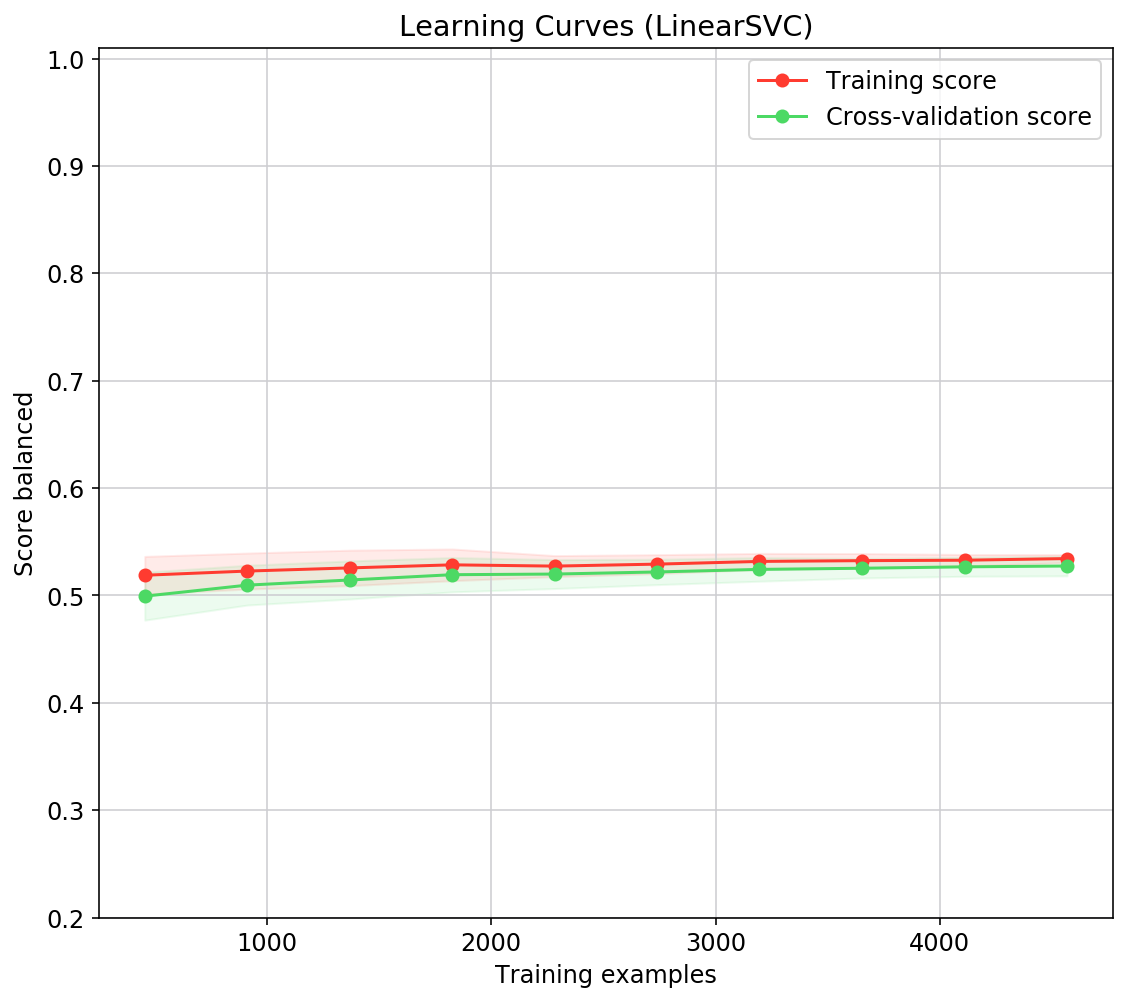

In [14]:
title = "Learning Curves (LinearSVC)"
cv = ShuffleSplit(n_splits=10, test_size=0.1)
fig = plt.figure(figsize=(20,8))
n = 121
for score in SCORES:
    mp.plot_learning_curve(
        fig.add_subplot(n), clf, title, X, Y, scoring=score[0],
        ylim=(score[1], score[2]), cv=cv, n_jobs=-1,
        train_sizes=np.linspace(.1, 1.0, 10))
    n += 1

##  LinearSVC - Curva de validación

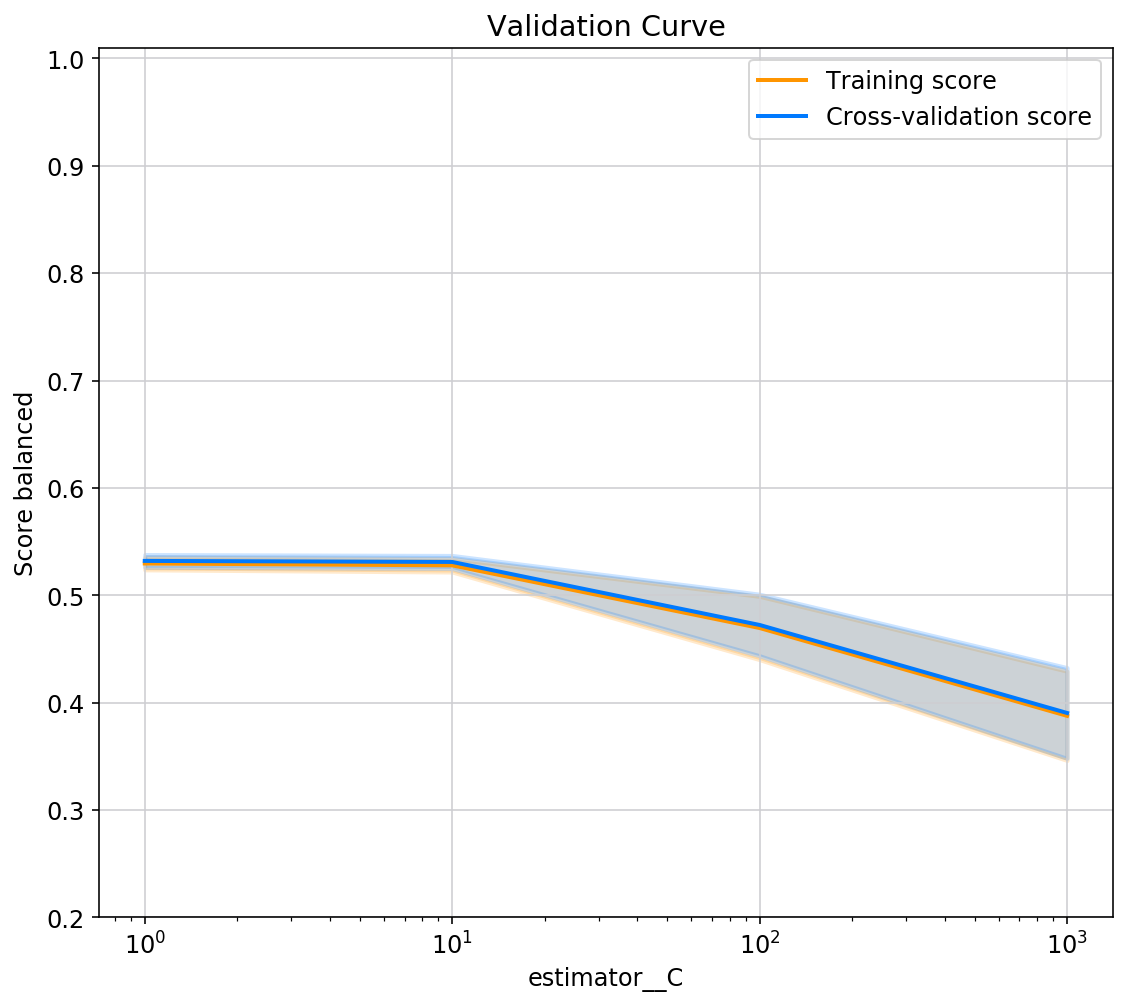

In [15]:
PARAM_NAMES = ['estimator__C']
PARAM_RANGES = [[1, 10, 100, 1000]]
cv = ShuffleSplit(n_splits=10, test_size=0.5)
clf = MultiOutputClassifier(LinearSVC())
fig = plt.figure(figsize=(20, 8))
n = 121
for score in SCORES:
    ax = mp.plot_validation_curve(
        fig.add_subplot(n), clf, X, Y, param_name=PARAM_NAMES[0],
        param_range=PARAM_RANGES[0], cv=cv, scoring=score[0],
        ylim=(score[1], score[2]))
    ax.semilogx()
    n += 1

## LinearSVC - Resultados

In [16]:
print('Normal')
clf = MultiOutputClassifier(LinearSVC())
display(mp.cross_val_report(clf, cv, X, Y, True))
print('Chained')
clf = ChainedMultiOutputClassifier(LinearSVC())
display(mp.cross_val_report(clf, cv, X, Y, True))

Normal


Name,Score
balanced,0.5294 +/-(0.0061)
brier,0.0000 +/-(0.0000)
normal,0.0768 +/-(0.0043)
codec,0.7748 +/-(0.0121)
filter_,0.6686 +/-(0.0139)
codec_filter,0.5160 +/-(0.0155)
c_level,0.1733 +/-(0.0084) ~ 0.5621 +/-(0.0045)
block,0.1390 +/-(0.0051) ~ 0.5212 +/-(0.0035)
cl_block,0.1000 +/-(0.0051) ~ 0.5405 +/-(0.0038)


Chained


Name,Score
balanced,0.6194 +/-(0.0067)
brier,0.0000 +/-(0.0000)
normal,0.1429 +/-(0.0077)
codec,0.8407 +/-(0.0130)
filter_,0.7246 +/-(0.0135)
codec_filter,0.6183 +/-(0.0136)
c_level,0.3244 +/-(0.0159) ~ 0.5429 +/-(0.0221)
block,0.3168 +/-(0.0090) ~ 0.6557 +/-(0.0162)
cl_block,0.1678 +/-(0.0059) ~ 0.6108 +/-(0.0111)


In [17]:
CUSTOM2_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'Max', 'Min']
X = scale(df[CUSTOM2_IN].values)
print('Normal')
clf = MultiOutputClassifier(LinearSVC())
display(mp.cross_val_report(clf, cv, X, Y, True))
print('Chained')
clf = ChainedMultiOutputClassifier(LinearSVC())
display(mp.cross_val_report(clf, cv, X, Y, True))

/home/shurberto/miniconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Normal


Name,Score
balanced,0.5305 +/-(0.0070)
brier,0.0000 +/-(0.0000)
normal,0.0710 +/-(0.0070)
codec,0.7675 +/-(0.0076)
filter_,0.6630 +/-(0.0161)
codec_filter,0.5220 +/-(0.0124)
c_level,0.1724 +/-(0.0049) ~ 0.5647 +/-(0.0062)
block,0.1384 +/-(0.0046) ~ 0.5223 +/-(0.0043)
cl_block,0.1036 +/-(0.0035) ~ 0.5368 +/-(0.0034)


Chained


Name,Score
balanced,0.6208 +/-(0.0106)
brier,0.0000 +/-(0.0000)
normal,0.1435 +/-(0.0076)
codec,0.8437 +/-(0.0088)
filter_,0.7249 +/-(0.0169)
codec_filter,0.6210 +/-(0.0135)
c_level,0.3272 +/-(0.0101) ~ 0.5428 +/-(0.0246)
block,0.3063 +/-(0.0088) ~ 0.6535 +/-(0.0206)
cl_block,0.1712 +/-(0.0090) ~ 0.6138 +/-(0.0077)


In [18]:
CUSTOM_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'BLZ_CSpeed']
X = scale(df[CUSTOM_IN].values)
print('Normal')
clf = MultiOutputClassifier(LinearSVC())
display(mp.cross_val_report(clf, cv, X, Y, True))
print('Chained')
clf = ChainedMultiOutputClassifier(LinearSVC())
display(mp.cross_val_report(clf, cv, X, Y, True))

Normal


Name,Score
balanced,0.5197 +/-(0.0046)
brier,0.0000 +/-(0.0000)
normal,0.0688 +/-(0.0052)
codec,0.7777 +/-(0.0063)
filter_,0.6350 +/-(0.0094)
codec_filter,0.4986 +/-(0.0121)
c_level,0.1657 +/-(0.0045) ~ 0.5626 +/-(0.0066)
block,0.1363 +/-(0.0042) ~ 0.5204 +/-(0.0041)
cl_block,0.1002 +/-(0.0034) ~ 0.5416 +/-(0.0043)


Chained


Name,Score
balanced,0.6050 +/-(0.0074)
brier,0.0000 +/-(0.0000)
normal,0.1520 +/-(0.0117)
codec,0.8480 +/-(0.0091)
filter_,0.6983 +/-(0.0136)
codec_filter,0.6115 +/-(0.0093)
c_level,0.3255 +/-(0.0123) ~ 0.5523 +/-(0.0307)
block,0.3167 +/-(0.0151) ~ 0.6641 +/-(0.0235)
cl_block,0.1704 +/-(0.0077) ~ 0.6031 +/-(0.0189)
